In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
quantmodelDir = '/users/hgmartin/libraries/quantmodel'

%matplotlib inline

import sys, os
pythonPath = quantmodelDir+"/code/core"
if pythonPath not in sys.path:
    sys.path.append(pythonPath)
os.environ["QUANTMODELPATH"] = quantmodelDir

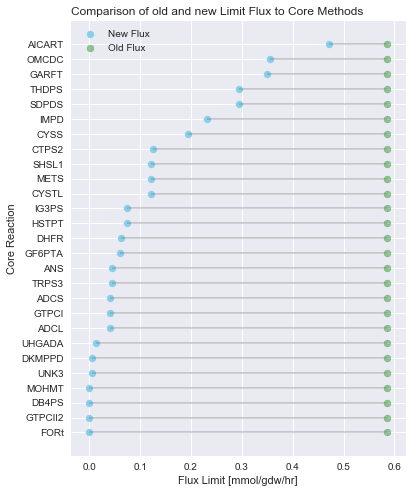

In [4]:
# Load the dataframe
df = pd.read_csv('lf2cfig1.csv', sep='\t', names= ['Reactions', 'New Flux','Old Flux'])

# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='New Flux')
my_range=range(1,len(df.index)+1)
 
# Initialize BIG figure
fig = plt.figure(1, [6, 8])    
ax = fig.add_subplot(111)

# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['New Flux'], xmax=(ordered_df['Old Flux']), color='grey', alpha=0.4)
plt.scatter(ordered_df['New Flux']+.00000001, my_range, color='skyblue', alpha=1, label='New Flux')
plt.scatter((ordered_df['Old Flux']), my_range, color='green', alpha=0.4 , label='Old Flux')
#plt.scatter(500*abs(ordered_df['Abs. Old Flux'] < 0), my_range, color='red', alpha=1 , label='Negative Old Flux')

#ax.set_xscale('log')
#ax.set_xlim([0.00000001,1000])
plt.legend()

plt.yticks(my_range, ordered_df['Reactions'])
plt.title("Comparison of old and new Limit Flux to Core Methods", loc='left')
plt.xlabel('Flux Limit [mmol/gdw/hr]')
plt.ylabel('Core Reaction')
plt.savefig("fig1-v4.pdf")